In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    En primer lugar cabe destacar que trabajo con los residuos de un MLGM: 
    Efecto fijo: Localidad + cultivar + localidad>repeticion
    Efecto aleatorio:

In [10]:
df = pd.read_excel("C:/Users/marti/Desktop/GAB2023/datos/datos_Martin_residuos_interaccion.xlsx")

In [8]:
df.columns

Index(['a_Tocopherol', 'g_Tocopherol', 'd_Tocopherol', 'a_g_d_Tocopherol',
       'Palmitic_Acid', 'Palmitoleic_Acid', 'Stearic_Acid', 'Oleic_Acid',
       'Linoleic_Acid', 'Linolenic_Acid', 'Arachidic_Acid', 'Ecosenoic_Acid',
       'OSI', 'Oil_content', 'Tmx_IF.MF', 'Tmed_IF.MF', 'T_mn_IF.MF',
       'pp_IF.MF', 'etp_IF..MF', 'Localidad', 'Cultivar', 'RepeticiÃ³n',
       'Repeticion', 'Codigo', 'IV', 'Ambiente', 'Fecha_de_siembra_S',
       'inicio_de_floraciÃ³n_IF', 'Madurez_fisiologica_MF', 'Dur_S.IF',
       'Dur_S.MF', 'Dur_IF.MF', 'Palmitic_Acid_r', 'Palmitoleic_Acid_r',
       'Stearic_Acid_r', 'Oleic_Acid_r', 'Linoleic_Acid_r', 'Linolenic_Acid_r',
       'Arachidic_Acid_r', 'Ecosenoic_Acid_r', 'ac_insat', 'ac_sat',
       'tot_acinsat_r', 'tot_acsat_r', 'RDUO 0 Linolenic_Acid',
       'RE 0 Linolenic_Acid'],
      dtype='object')

In [9]:
df.head()

,a_Tocopherol,g_Tocopherol,d_Tocopherol,a_g_d_Tocopherol,Palmitic_Acid,Palmitoleic_Acid,Stearic_Acid,Oleic_Acid,Linoleic_Acid,Linolenic_Acid,...,Linoleic_Acid_r,Linolenic_Acid_r,Arachidic_Acid_r,Ecosenoic_Acid_r,ac_insat,ac_sat,tot_acinsat_r,tot_acsat_r,RDUO 0 Linolenic_Acid,RE 0 Linolenic_Acid
0,502.64,826.36,6.18,1335.18,4.26,0.20,2.04,64.49,20.41,7.11,...,9.178377,3.197367,0.197868,0.476682,93.07,6.94,41.853579,3.120918,-0.170192,-0.421027
1,511.20,788.10,7.36,1306.66,4.24,0.20,1.96,64.51,20.48,7.01,...,9.160704,3.135573,0.228123,0.487557,93.09,6.91,41.639157,3.090843,0.034423,0.085157
2,317.95,726.27,0.00,1044.22,3.96,0.17,1.89,65.69,18.65,7.92,...,8.661060,3.678048,0.222912,0.617652,93.59,6.50,43.463196,3.018600,-0.155192,-0.383919
3,356.28,796.46,7.22,1159.96,4.45,0.19,2.21,65.64,18.53,7.51,...,8.631274,3.498158,0.190978,0.493748,92.74,7.26,43.198292,3.381708,-0.260577,-0.644623
4,405.68,745.75,3.79,1155.22,4.17,0.17,1.95,65.82,19.38,7.04,...,8.730690,3.171520,0.139655,0.518075,93.39,6.60,42.072195,2.973300,-0.322692,-0.798286


In [3]:
corr = df[["Linolenic_Acid",'RDUO 0 Linolenic_Acid', 
            'RE 0 Linolenic_Acid','Tmx_IF.MF', 'Tmed_IF.MF', 'T_mn_IF.MF',
       'pp_IF.MF', 'etp_IF..MF']]

corr.corr()

,Linolenic_Acid,RDUO 0 Linolenic_Acid,RE 0 Linolenic_Acid,Tmx_IF.MF,Tmed_IF.MF,T_mn_IF.MF,pp_IF.MF,etp_IF..MF
Linolenic_Acid,1.000000,0.451331,0.451331,-0.501003,-0.385963,-0.311024,0.087119,0.002761
RDUO 0 Linolenic_Acid,0.451331,1.000000,1.000000,-0.029668,-0.013045,-0.011763,0.010934,0.033757
RE 0 Linolenic_Acid,0.451331,1.000000,1.000000,-0.029668,-0.013045,-0.011763,0.010934,0.033757
Tmx_IF.MF,-0.501003,-0.029668,-0.029668,1.000000,0.955743,0.928283,0.661417,0.457319
Tmed_IF.MF,-0.385963,-0.013045,-0.013045,0.955743,1.000000,0.962368,0.779492,0.514262
T_mn_IF.MF,-0.311024,-0.011763,-0.011763,0.928283,0.962368,1.000000,0.744249,0.450286
pp_IF.MF,0.087119,0.010934,0.010934,0.661417,0.779492,0.744249,1.000000,0.449021
etp_IF..MF,0.002761,0.033757,0.033757,0.457319,0.514262,0.450286,0.449021,1.000000


In [11]:
corr.corr(method="spearman")

,Linolenic_Acid,RDUO 0 Linolenic_Acid,RE 0 Linolenic_Acid,Tmx_IF.MF,Tmed_IF.MF,T_mn_IF.MF,pp_IF.MF,etp_IF..MF
Linolenic_Acid,1.000000,0.417457,0.417457,-0.339207,-0.252120,-0.264650,0.052973,-0.336498
RDUO 0 Linolenic_Acid,0.417457,1.000000,1.000000,-0.074050,-0.060455,-0.054886,-0.036015,-0.065074
RE 0 Linolenic_Acid,0.417457,1.000000,1.000000,-0.074050,-0.060455,-0.054886,-0.036015,-0.065074
Tmx_IF.MF,-0.339207,-0.074050,-0.074050,1.000000,0.956038,0.964381,0.716676,0.665966
Tmed_IF.MF,-0.252120,-0.060455,-0.060455,0.956038,1.000000,0.971874,0.816049,0.628668
T_mn_IF.MF,-0.264650,-0.054886,-0.054886,0.964381,0.971874,1.000000,0.777544,0.609280
pp_IF.MF,0.052973,-0.036015,-0.036015,0.716676,0.816049,0.777544,1.000000,0.461340
etp_IF..MF,-0.336498,-0.065074,-0.065074,0.665966,0.628668,0.609280,0.461340,1.000000


* La T maxima es la mas correlacionada con linolenic y los residuos.

In [24]:
# df["T_cua"]=df["Tmx_IF.MF"]**2
# df["P_cua"]=df["pp_IF.MF"]**2
# ,"T_cua","P_cua"

In [45]:
x = df[['Tmx_IF.MF','pp_IF.MF', 'etp_IF..MF']]

y= df['RE 0 Linolenic_Acid']

In [46]:
from sklearn.preprocessing import RobustScaler
ro_scaler=RobustScaler()
x_scal=ro_scaler.fit_transform(x)

In [47]:
x_scal_df=pd.DataFrame(data=x_scal,columns=x.columns)  

In [28]:
# Comparamos los 3 mejores modelos con cross validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

folds=15

scoring = {'r2_score':make_scorer(r2_score),
           'rmse':make_scorer(mean_squared_error),
           'mae':make_scorer(mean_absolute_error)
          }

lgbm_model = LGBMRegressor(n_estimators=10,random_state=0)
lgbm = cross_validate(lgbm_model, x_scal, y, cv=folds, scoring=scoring)

xgb_model = XGBRegressor(n_estimators=10,random_state=0)
xgb = cross_validate(xgb_model, x_scal, y, cv=folds, scoring=scoring)

rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf = cross_validate(rf_model, x_scal, y, cv=folds, scoring=scoring)

lin_model = LinearRegression()
lin = cross_validate(lin_model, x_scal, y, cv=folds, scoring=scoring)

knn_model = KNeighborsRegressor()
knn = cross_validate(knn_model, x_scal, y, cv=folds, scoring=scoring)

models_scores_table = pd.DataFrame({'LGBMRegressor':[lgbm['test_r2_score'].mean(),
                                                     lgbm['test_rmse'].mean(),
                                                     lgbm['test_mae'].mean()
                                                     ],

                                    'LinearRegression':[lin['test_r2_score'].mean(),
                                                     lin['test_rmse'].mean(),
                                                     lin['test_mae'].mean()
                                                     ],
                                    'KNeighborsRegressor':[knn['test_r2_score'].mean(),
                                                     knn['test_rmse'].mean(),
                                                     knn['test_mae'].mean()
                                                     ],
                                    'XGBRegressor':[xgb['test_r2_score'].mean(),
                                                     xgb['test_rmse'].mean(),
                                                     xgb['test_mae'].mean()
                                                     ],
                                    'RandomForestRegressor':[rf['test_r2_score'].mean(),
                                                     rf['test_rmse'].mean(),
                                                     rf['test_mae'].mean()
                                                     ]
                                    },
                                    index=['r2_score',"mse","mae"]
                                   )

# Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmin(axis=1)

In [29]:
models_scores_table

,LGBMRegressor,LinearRegression,KNeighborsRegressor,XGBRegressor,RandomForestRegressor,Best Score
r2_score,-0.379868,-0.561791,-0.865536,-2.321378,-2.242601,XGBRegressor
mse,0.860861,1.033872,1.010330,2.033721,1.947713,LGBMRegressor
mae,0.672201,0.726062,0.727650,0.919142,0.927942,LGBMRegressor


# RF

In [30]:
import optuna  # pip install optuna
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor

def objective(trial, x, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 1, 50, step=1),
        "max_depth": trial.suggest_int("max_depth", 1, 30, step=1)
    }
    cv = LeaveOneOut()

    cv_scores = np.empty(104)
    for idx, (train_idx, test_idx) in enumerate(cv.split(x, y)):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = RandomForestRegressor(n_jobs = -1, random_state=0,**param_grid)
        model.fit(
            x_train,
            y_train
        )
        preds = model.predict(x_test)
        cv_scores[idx] = mean_squared_error(y_test,preds, squared=True)

    return np.mean(cv_scores)

In [31]:
study = optuna.create_study(direction="minimize", study_name="RF Regressor")
func = lambda trial: objective(trial, x_scal_df, y)
study.optimize(func, n_trials=15)

[I 2023-08-10 18:29:30,018] A new study created in memory with name: RF Regressor


[I 2023-08-10 18:29:34,762] Trial 0 finished with value: 1.3531358927797479 and parameters: {'n_estimators': 34, 'max_depth': 25}. Best is trial 0 with value: 1.3531358927797479.
[I 2023-08-10 18:29:39,352] Trial 1 finished with value: 1.3628357476153945 and parameters: {'n_estimators': 32, 'max_depth': 29}. Best is trial 0 with value: 1.3531358927797479.
[I 2023-08-10 18:29:43,732] Trial 2 finished with value: 1.1399492417647812 and parameters: {'n_estimators': 32, 'max_depth': 3}. Best is trial 2 with value: 1.1399492417647812.
[I 2023-08-10 18:29:45,462] Trial 3 finished with value: 1.3813195992802176 and parameters: {'n_estimators': 7, 'max_depth': 30}. Best is trial 2 with value: 1.1399492417647812.
[I 2023-08-10 18:29:50,424] Trial 4 finished with value: 1.3493653840704387 and parameters: {'n_estimators': 38, 'max_depth': 25}. Best is trial 2 with value: 1.1399492417647812.
[I 2023-08-10 18:29:51,631] Trial 5 finished with value: 1.101553844633591 and parameters: {'n_estimators':

In [32]:
print(f"\tBest value (mse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (mse): 0.94117
	Best params:
		n_estimators: 2
		max_depth: 1


In [33]:
# Instanciamos el modelo
model = RandomForestRegressor(n_estimators= 2,
                      max_depth= 1, random_state=0
                      )

In [34]:
# Entrenamos el modelo
model.fit(x_scal_df, y)

RandomForestRegressor(max_depth=1, n_estimators=2, random_state=0)

In [36]:
# from sklearn.inspection import permutation_importance
# import warnings
# warnings.filterwarnings("ignore")

# # # the permutation based importance
# perm_importance = permutation_importance(model, x_scal, y)

# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")


# LGBM

In [101]:
# model = LGBMRegressor(n_estimators=10,random_state=0)

# model.fit(x_scal, y)

# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
# feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,x.columns)), columns=['Value','Feature'])

# plt.figure(figsize=(20, 10))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.legend(fontsize="20")
# plt.tight_layout()
# plt.show()


# Linear regression

In [105]:
# model = LinearRegression()

# model.fit(x_scal, y)

# coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

# coefficients.head()

# LGBM hyp

In [59]:
import optuna  # pip install optuna
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut
from lightgbm import LGBMRegressor

def objective(trial, x, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 10, 50, step=1),
        # "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 3, 20, step=1),
        "max_depth": trial.suggest_int("max_depth", 1, 10, step=1)
    }

    cv = LeaveOneOut()

    cv_scores = np.empty(104)
    for idx, (train_idx, test_idx) in enumerate(cv.split(x, y)):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMRegressor(n_jobs = -1, random_state=0,**param_grid)
        model.fit(
            x_train,
            y_train,
            eval_metric="mean_squared_error"
        )
        preds = model.predict(x_test)
        cv_scores[idx] = mean_squared_error(y_test,preds, squared=True)

    return np.mean(cv_scores)

In [60]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, x_scal_df, y)
study.optimize(func, n_trials=50)

[I 2023-08-10 18:35:40,112] A new study created in memory with name: LGBM Regressor
[I 2023-08-10 18:35:40,731] Trial 0 finished with value: 0.9292082670807589 and parameters: {'n_estimators': 29, 'num_leaves': 8, 'max_depth': 2}. Best is trial 0 with value: 0.9292082670807589.
[I 2023-08-10 18:35:41,425] Trial 1 finished with value: 0.9416073975404868 and parameters: {'n_estimators': 38, 'num_leaves': 3, 'max_depth': 10}. Best is trial 0 with value: 0.9292082670807589.
[I 2023-08-10 18:35:42,039] Trial 2 finished with value: 0.9237785170128714 and parameters: {'n_estimators': 20, 'num_leaves': 19, 'max_depth': 5}. Best is trial 2 with value: 0.9237785170128714.
[I 2023-08-10 18:35:42,643] Trial 3 finished with value: 0.9185921938605838 and parameters: {'n_estimators': 18, 'num_leaves': 18, 'max_depth': 4}. Best is trial 3 with value: 0.9185921938605838.
[I 2023-08-10 18:35:43,239] Trial 4 finished with value: 0.9115193870899367 and parameters: {'n_estimators': 15, 'num_leaves': 5, 'ma

In [61]:
print(f"\tBest value (mse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (mse): 0.86358
	Best params:
		n_estimators: 10
		num_leaves: 17
		max_depth: 1


In [65]:
# Instanciamos el modelo
from lightgbm import LGBMRegressor

# Importancia a otras T tambien. 
# model = LGBMRegressor(n_estimators= 10,
#                       num_leaves= 3,
#                       max_depth= 27
#                       )

# No le da imp a las otras T.
# model = LGBMRegressor(n_estimators= 11,
#                       num_leaves= 15,
#                       max_depth= 1
#                       )

# No, etp importante
# model = LGBMRegressor(n_estimators= 10,
#                       num_leaves= 14,
#                       max_depth= 1
#                       )

# No le da imp a las otras T.
model = LGBMRegressor(n_estimators= 18,
                      num_leaves= 15,
                      max_depth= 1
                      )

# cuadraticos no da nada bien, no tiene en cuenta.
# model = LGBMRegressor(n_estimators= 10,
#                       num_leaves= 17,
#                       max_depth= 1
#                       )

In [66]:
# Entrenamos el modelo
model.fit(x_scal_df, y)

LGBMRegressor(max_depth=1, n_estimators=18, num_leaves=15)

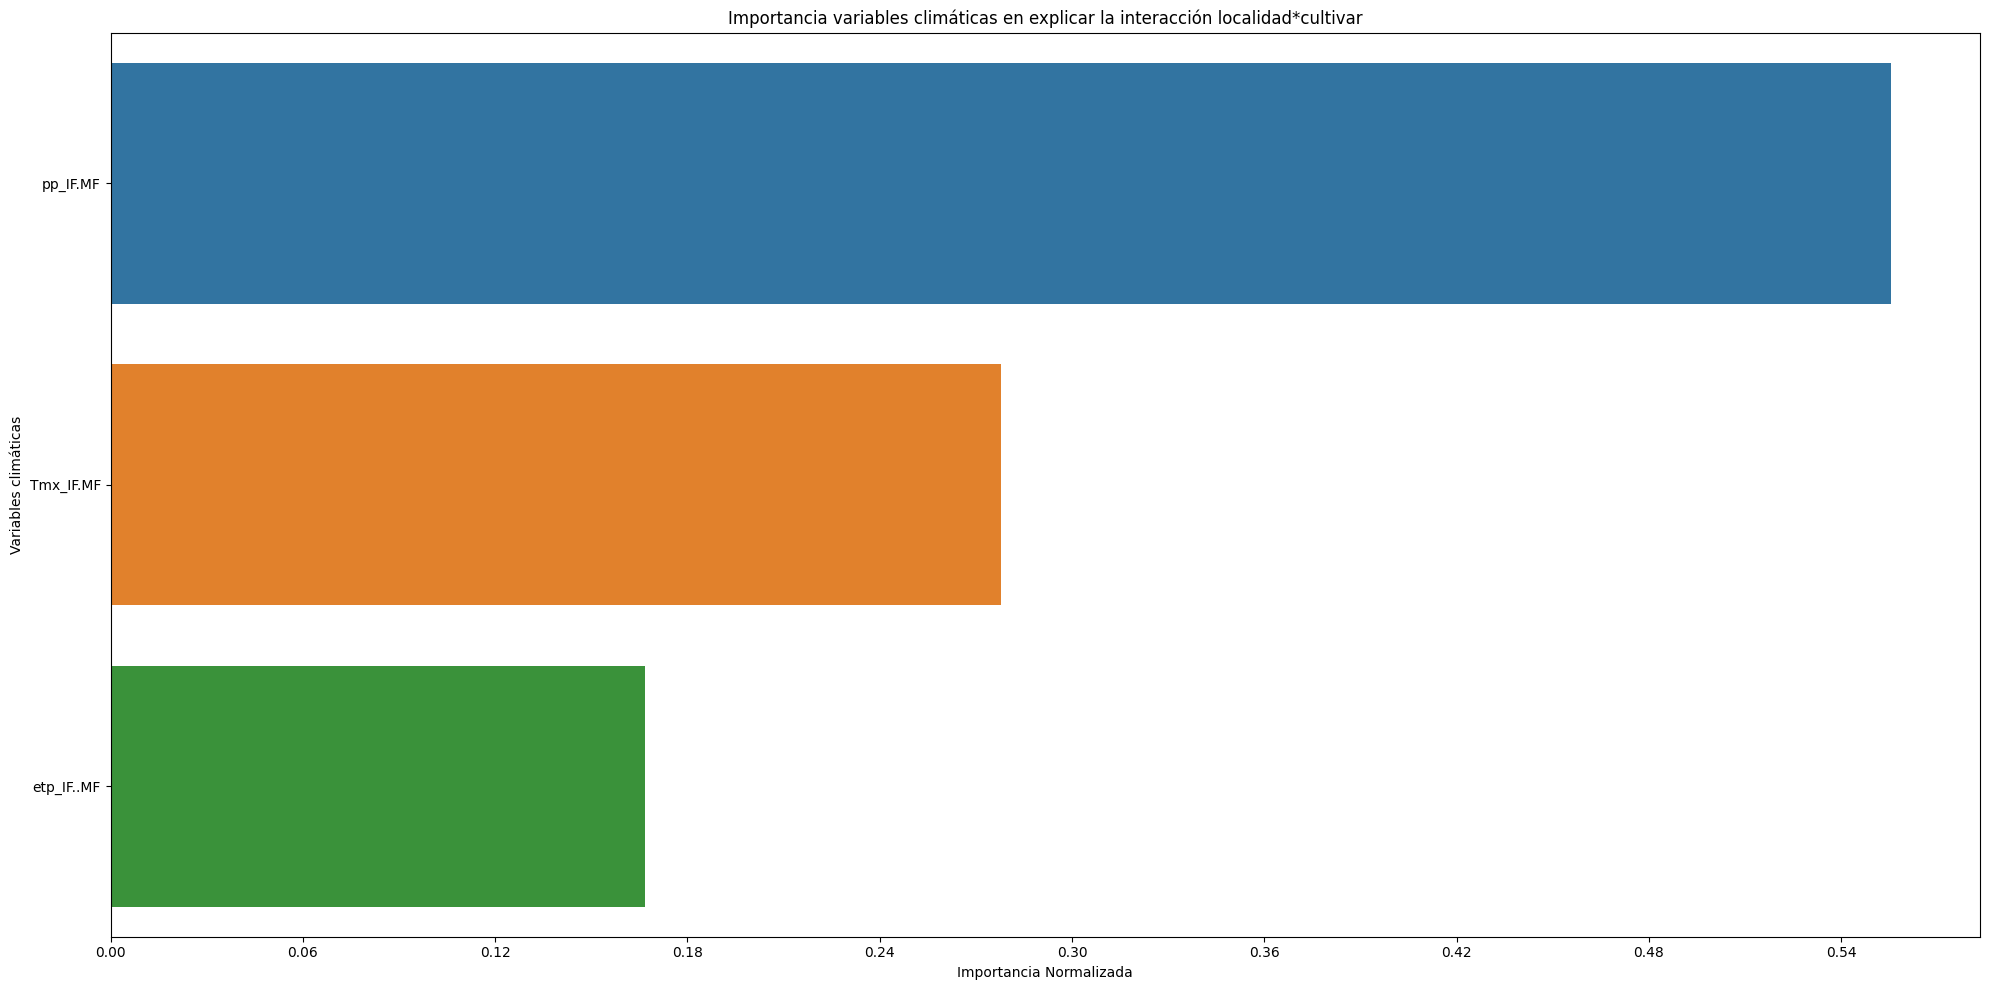

In [67]:
# Obtener los valores de importancia de características y los nombres de las características
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, x.columns), reverse=True), columns=['Value', 'Feature'])

# Calcular la suma total de las importancias
total_importance = feature_imp['Value'].sum()

# Normalizar los valores de importancia dividiendo por la suma total
feature_imp['Normalized_Value'] = feature_imp['Value'] / total_importance

plt.figure(figsize=(20, 10))
sns.barplot(x='Normalized_Value', y='Feature', data=feature_imp.sort_values(by='Normalized_Value', ascending=False))
plt.title('Importancia variables climáticas en explicar la interacción localidad*cultivar')
plt.ylabel('Variables climáticas')
plt.xlabel('Importancia Normalizada')
plt.tight_layout()

# Agregar más tics en el eje x
num_tics = 10  # Puedes ajustar este valor para agregar más o menos tics
tics_location = plt.MaxNLocator(num_tics)
plt.gca().xaxis.set_major_locator(tics_location)

plt.show()

In [ ]:
feature_imp.to_csv()

In [84]:
import shap

In [85]:
shap_values = shap.TreeExplainer(model).shap_values(x_scal_df)
# x = df[['Tmx_IF.MF', 'Tmed_IF.MF', 'T_mn_IF.MF',
#        'pp_IF.MF', 'etp_IF..MF']]

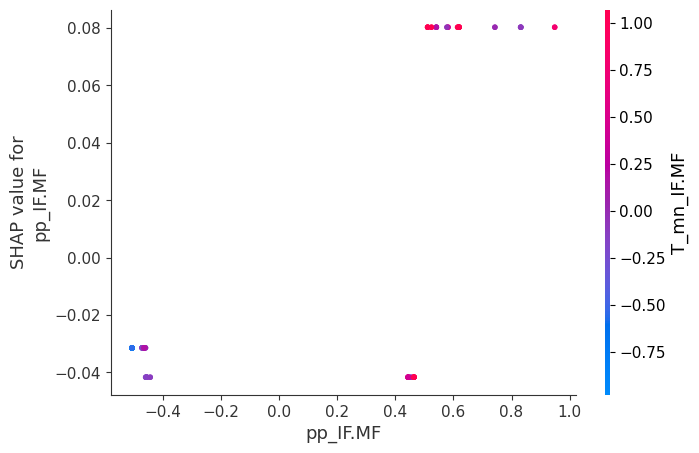

In [87]:
shap.dependence_plot('pp_IF.MF', shap_values, x_scal_df)

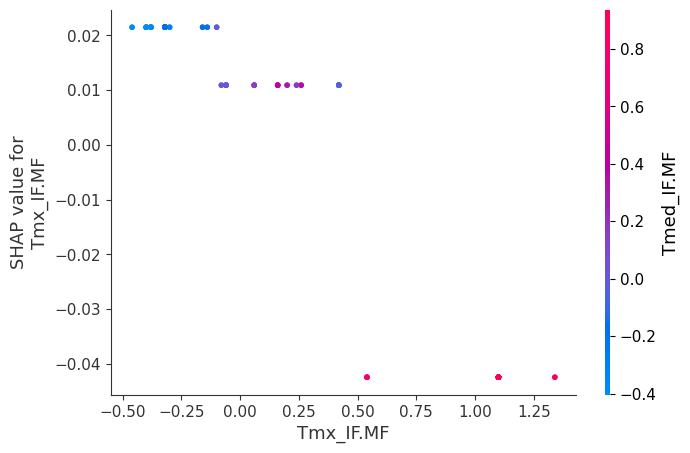

In [86]:
shap.dependence_plot('Tmx_IF.MF', shap_values, x_scal_df)

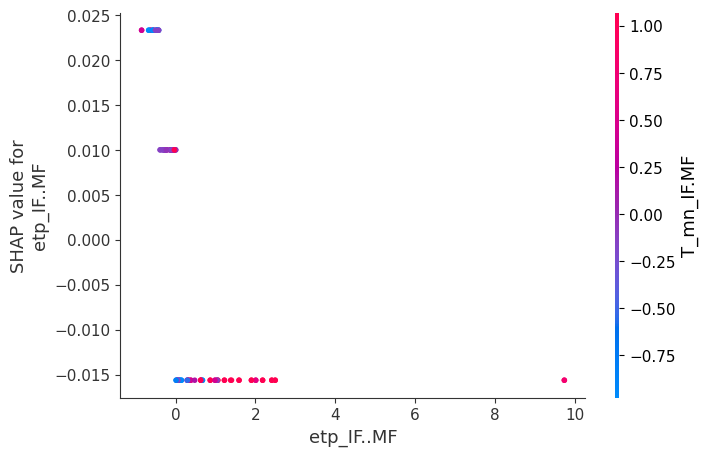

In [88]:
shap.dependence_plot('etp_IF..MF', shap_values, x_scal_df)

# Pero quien explica mejor el acido linolenico

Ajustamos a otra variable respuesta


In [69]:
x = df[['Tmx_IF.MF',  'pp_IF.MF', 'etp_IF..MF']]

# 'Tmed_IF.MF', 'T_mn_IF.MF',

y= df['Linolenic_Acid']

In [70]:
from sklearn.preprocessing import RobustScaler
ro_scaler=RobustScaler()
x_scal=ro_scaler.fit_transform(x)

In [71]:
x_scal_df=pd.DataFrame(data=x_scal,columns=x.columns)  

In [73]:
import optuna  # pip install optuna
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

def objective(trial, x, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 10, 50, step=1),
        # "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 3, 20, step=1),
        "max_depth": trial.suggest_int("max_depth", 1, 30, step=1)
    }

    cv = LeaveOneOut()

    cv_scores = np.empty(104)
    for idx, (train_idx, test_idx) in enumerate(cv.split(x, y)):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMRegressor(n_jobs = -1, random_state=0,**param_grid)
        model.fit(
            x_train,
            y_train,
            eval_metric="mean_squared_error"
        )
        preds = model.predict(x_test)
        cv_scores[idx] = mean_squared_error(y_test,preds, squared=True)

    return np.mean(cv_scores)

In [74]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, x_scal_df, y)
study.optimize(func, n_trials=50)

[I 2023-08-10 18:38:04,804] A new study created in memory with name: LGBM Regressor
[I 2023-08-10 18:38:05,641] Trial 0 finished with value: 0.21107213952898274 and parameters: {'n_estimators': 50, 'num_leaves': 14, 'max_depth': 21}. Best is trial 0 with value: 0.21107213952898274.
[I 2023-08-10 18:38:06,357] Trial 1 finished with value: 0.20997049862405837 and parameters: {'n_estimators': 25, 'num_leaves': 4, 'max_depth': 15}. Best is trial 1 with value: 0.20997049862405837.
[I 2023-08-10 18:38:07,349] Trial 2 finished with value: 0.2091167714191755 and parameters: {'n_estimators': 27, 'num_leaves': 10, 'max_depth': 19}. Best is trial 2 with value: 0.2091167714191755.
[I 2023-08-10 18:38:07,908] Trial 3 finished with value: 0.22930850752146137 and parameters: {'n_estimators': 14, 'num_leaves': 15, 'max_depth': 2}. Best is trial 2 with value: 0.2091167714191755.
[I 2023-08-10 18:38:08,585] Trial 4 finished with value: 0.20808890333929245 and parameters: {'n_estimators': 28, 'num_leaves

In [75]:
print(f"\tBest value (mse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (mse): 0.20696
	Best params:
		n_estimators: 31
		num_leaves: 5
		max_depth: 12


In [76]:
# Instanciamos el modelo
from lightgbm import LGBMRegressor

# Importancia a otras T tambien. 
# model = LGBMRegressor(n_estimators= 10,
#                       num_leaves= 3,
#                       max_depth= 27
#                       )

# No le da imp a las otras T.
# model = LGBMRegressor(n_estimators= 11,
#                       num_leaves= 15,
#                       max_depth= 1
#                       )

# No, etp importante
# model = LGBMRegressor(n_estimators= 10,
#                       num_leaves= 14,
#                       max_depth= 1
#                       )

# No le da imp a las otras T.
model = LGBMRegressor(n_estimators= 31,
                      num_leaves= 5,
                      max_depth= 12
                      )

In [77]:
# Entrenamos el modelo
model.fit(x_scal_df, y)

LGBMRegressor(max_depth=12, n_estimators=31, num_leaves=5)

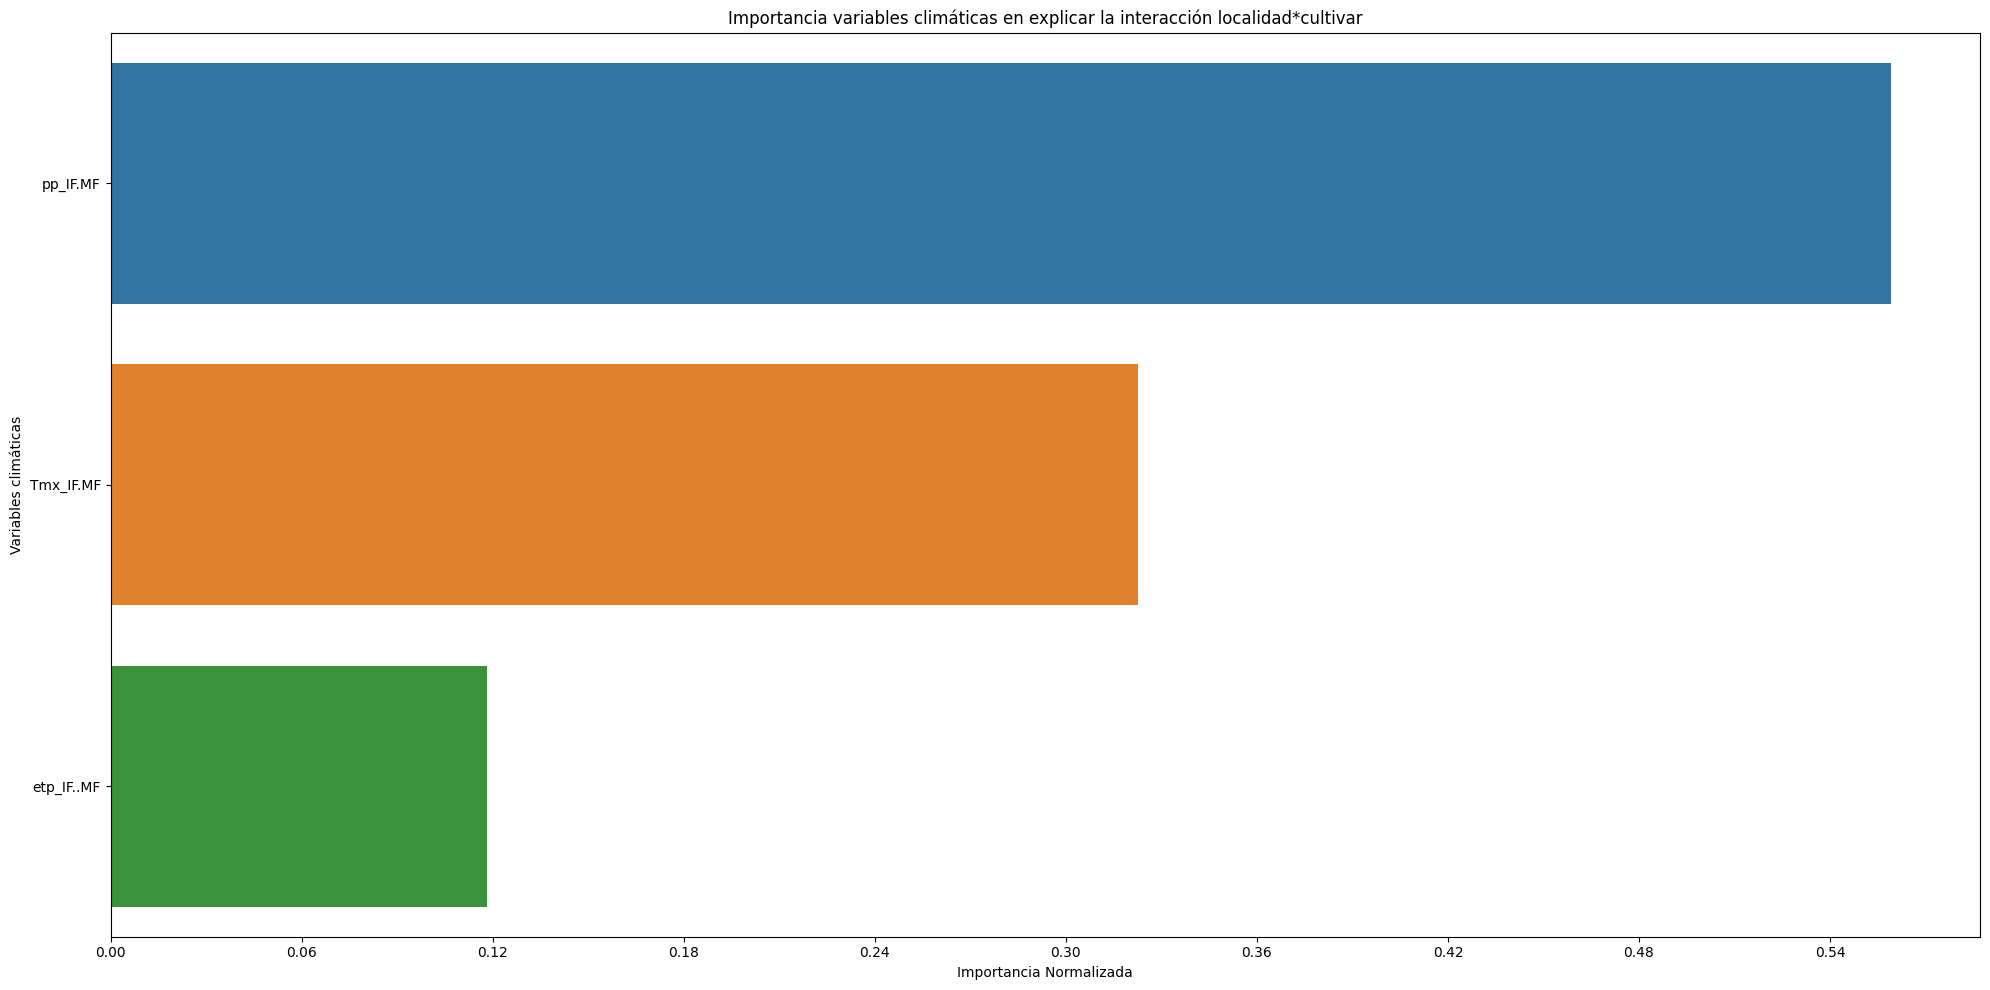

In [78]:
# Obtener los valores de importancia de características y los nombres de las características
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, x.columns), reverse=True), columns=['Value', 'Feature'])

# Calcular la suma total de las importancias
total_importance = feature_imp['Value'].sum()

# Normalizar los valores de importancia dividiendo por la suma total
feature_imp['Normalized_Value'] = feature_imp['Value'] / total_importance

plt.figure(figsize=(20, 10))
sns.barplot(x='Normalized_Value', y='Feature', data=feature_imp.sort_values(by='Normalized_Value', ascending=False))
plt.title('Importancia variables climáticas en explicar la interacción localidad*cultivar')
plt.ylabel('Variables climáticas')
plt.xlabel('Importancia Normalizada')
plt.tight_layout()

# Agregar más tics en el eje x
num_tics = 10  # Puedes ajustar este valor para agregar más o menos tics
tics_location = plt.MaxNLocator(num_tics)
plt.gca().xaxis.set_major_locator(tics_location)

plt.show()